# **Solar Data Discovery** 

## **Togo Data Profiling, Cleaning, and EDA**

In [2]:
# Import Required Libraries   
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy.stats import zscore
import seaborn as sns

In [3]:
# Reading DataSets 
togo_data = pd.read_csv("../data/togo-dapaong_qc.csv", parse_dates=['Timestamp'])

### Data Profiling

In [4]:
# display the first 10 records
togo_data.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
5,2021-10-25 00:06:00,-1.2,0.0,0.0,0.0,0.0,24.9,93.9,1.2,1.4,0.3,226.2,4.8,977,0,0.0,24.8,24.5,NaN
6,2021-10-25 00:07:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.8,1.2,1.4,0.3,226.4,0.9,977,0,0.0,24.8,24.5,NaN
7,2021-10-25 00:08:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.7,1.1,1.4,0.3,224.5,2.8,977,0,0.0,24.8,24.5,NaN
8,2021-10-25 00:09:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.6,1.0,1.4,0.3,225.6,4.1,977,0,0.0,24.8,24.5,NaN
9,2021-10-25 00:10:00,-1.1,0.0,0.0,0.0,0.0,24.9,93.4,0.9,1.4,0.4,231.5,0.9,977,0,0.0,24.8,24.5,NaN


In [5]:
# display the last 10 records 
togo_data.tail(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525590,2022-10-24 23:51:00,-0.2,0.0,0.0,0.0,0.0,25.1,56.2,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.4,24.3,NaN
525591,2022-10-24 23:52:00,-0.3,0.0,0.0,0.0,0.0,25.1,56.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.4,24.2,NaN
525592,2022-10-24 23:53:00,-0.4,0.0,0.0,0.0,0.0,25.1,55.0,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.4,24.2,NaN
525593,2022-10-24 23:54:00,-0.6,0.0,0.0,0.0,0.0,25.1,54.2,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.4,24.1,NaN
525594,2022-10-24 23:55:00,-0.7,0.0,0.0,0.0,0.0,25.1,53.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.1,NaN
525595,2022-10-24 23:56:00,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57:00,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58:00,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59:00,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN
525599,2022-10-25 00:00:00,-1.2,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


In [6]:
# display the shape of the data to get info about number features and instance 
print(f"Togo Solar data Information: ")
print(f"Instances: {togo_data.shape[0]} records ") # To display number of records 
print(f"Features:  {togo_data.shape[1] } columns")

Togo Solar data Information: 
Instances: 525600 records 
Features:  19 columns


In [7]:
# Dataset information about type of each columns, size 
togo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [8]:
# Getting number of unique values 
number_of_unique = pd.DataFrame({
    'columns': togo_data.columns,
    '# of unique': togo_data.nunique()
})
number_of_unique

,columns,# of unique
Timestamp,Timestamp,525600
GHI,GHI,8633
DNI,DNI,9612
DHI,DHI,6841
ModA,ModA,10672
ModB,ModB,8439
Tamb,Tamb,266
RH,RH,966
WS,WS,143
WSgust,WSgust,156


In [9]:
# getting number of missing values for all dataset
print("="*100)
print("Missing Values Detection ".center(150))
print("="*100, end="\n")
print(f"Total number of missing values in the Dataset: {togo_data.isna().sum().sum()}")
print("="*100, end="\n")

# columns having missing values more than 5%

print(f"A Dataset Feature Having missing values more than 5 %".center(150))
print("="*100)
for col in sierraleone_data.columns: #
    percent =(sierraleone_data[col].isna().sum()/sierraleone_data.shape[0]) * 100
    if  percent.round(2) >= 5:
        print(f"Missing Values of column {col}: -> {percent} %")
print("="*100,end="\n")


                                                              Missing Values Detection                                                                
Total number of missing values in the Dataset: 525600
                                                A Dataset Feature Having missing values more than 5 %                                                 


NameError: name 'sierraleone_data' is not defined

In [10]:
# Feature contain missing values contain missing values more than 5% 
no_missing = pd.DataFrame({
    '# missing': togo_data.isna().sum(), 
    '% missing': togo_data.isna().mean() * 100
})

# Filter for columns with more than 5% missing values
no_missing_over_5 = no_missing[no_missing['% missing'] > 5]

no_missing_over_5

,# missing,% missing
Comments,525600,100.0


In [11]:
# After getting number of missing values feature "comment" is dropped 
togo_data.drop(['Comments'], axis=1, inplace=True)  # drop comments column

In [12]:

# Number of Duplicated values 
print("="*100)
print("Duplicated Values".center(160))
print("="*100)
print(f"Number of Duplicated values in the dataset: {togo_data.duplicated().sum()}".center(150)) # used to display the number of duplicated values in the dataset
print("="*100, end="\n")

                                                                       Duplicated Values                                                                        


                                                    Number of Duplicated values in the dataset: 0                                                     


In [ ]:
# finding incorrect entries from the dataset     
negative_values = pd.DataFrame({
    'num of -ve values': togo_data.select_dtypes(include='number').lt(0).sum(), # counting the number of negative values in the dataset
    "% of -ve values": round(togo_data.select_dtypes(include='number').lt(0).mean() *100, 2), # percentage of negative values
})

negative_values_0 = negative_values[negative_values['num of -ve values'] > 0]
negative_values_0

,num of -ve values,% of -ve values
GHI,261135,49.68
DNI,266352,50.68
DHI,263128,50.06


In [13]:
# This line code is used to clean negative values 
negative_cols = ['GHI', 'DNI', 'DHI', ] # List of columns to replace negative values with 0
togo_data[negative_cols] = togo_data[negative_cols].clip(lower=0) # Replace negative values with 0

In [17]:
# selected columns 
radiation_cols = ['GHI', 'DNI', 'DHI', 'ModA','ModB','WS', 'WSgust']

In [14]:
# checking statistical summary of the dataset for numerical features 
togo_data.describe(include = [np.number])

# This Statistical description is done after clipping negative values of GHI, DNI, and DHI 

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,231.718786,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330
std,321.691953,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277
min,0.000000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000


### Data Profiling Description

- The dataset contains 525,600 records and 19 columns, including timestamp, solar radiation measurements, temperature, humidity, wind, and other meteorological variables.
- All columns except "Comments" have complete data with no missing values. The "Comments" column is entirely missing (100% missing values).
- The columns "GHI", "DNI", and "DHI" (solar radiation measurements) initially contained a significant proportion of negative values (about 49-50%), which are physically implausible and were later clipped to zero.
- There are no duplicated records in the dataset.
- The dataset includes 16 float columns, 2 integer columns, and 1 datetime column.
- The number of unique values varies widely across columns, with "Timestamp" having 525,600 unique entries (one per record), and some columns (like "Cleaning") having only 2 unique values.
- The dataset is suitable for time series analysis, outlier detection, and further exploratory data analysis after handling missing and incorrect values.

#### Statistical Summary of `Togo Data`

- **Count**: All numerical columns have 525,600 non-missing values, indicating no missing data after cleaning (except for the dropped "Comments" column).
- **Mean & Std**: 
    - Solar radiation variables (`GHI`, `DNI`, `DHI`) have low mean values, reflecting the prevalence of nighttime or low-irradiance periods.
    - Temperature variables (`Tamb`, `TModA`, `TModB`) show realistic average values for the region, with moderate standard deviations.
    - Wind speed (`WS`, `WSgust`) and direction (`WD`) have low means and moderate variability.
    - Relative humidity (`RH`) has a high mean, indicating generally humid conditions.
- **Min & Max**: 
    - All negative values in `GHI`, `DNI`, and `DHI` have been clipped to zero, so their minimum is 0.
    - Maximum values for solar radiation and temperature columns are within expected physical ranges.
- **Quartiles**: 
    - The 25th, 50th (median), and 75th percentiles for each variable provide insight into the distribution and skewness of the data.
    - Many variables (e.g., `GHI`, `DNI`, `DHI`) have a median of 0, confirming a large proportion of zero or low values (nighttime or cloudy periods).


In [18]:
# checking for outliers using zscore
def z_score_outlier(col):
    outlier = {}
    for co in col:    
            zscore1 = np.abs(zscore(togo_data[co]))
            outlier[co]= zscore1 > 3 
    return outlier
outlier_z_score = z_score_outlier(radiation_cols)

# Displaying number of outlier for each columns 
z_score_Outlier = pd.DataFrame({
    'column': radiation_cols,
    '# of outlier': [outlier.sum() for outlier in outlier_z_score.values()],
    '% of Outlier':[round(outlier.mean() * 100, 2) for outlier in outlier_z_score.values()]
})
z_score_Outlier

,column,# of outlier,% of Outlier
0,GHI,314,0.06
1,DNI,1062,0.20
2,DHI,3415,0.65
3,ModA,137,0.03
4,ModB,206,0.04
5,WS,3510,0.67
6,WSgust,3915,0.74


In [22]:
#Calculate the z-scores for the radiation columns
z_scores = np.abs(zscore(togo_data[radiation_cols], nan_policy='omit'))

#Create a boolean mask where any z-score > 3 is True (outlier)
outlier = (z_scores > 3).any(axis=1)

# Drop those rows from the original dataset
togo_data_cleaned = togo_data[~outlier].copy()

In [23]:
# save cleaned data 
togo_data_cleaned.to_csv('../data/togo_clean.csv', index=False)

Time series analysis 

In [24]:
# Reading cleaned sierraleone data
togo_cleaned = pd.read_csv('../data/togo_clean.csv', parse_dates=['Timestamp'])

In [25]:
togo_cleaned["Year"] = togo_cleaned['Timestamp'].dt.year
togo_cleaned["month"] = togo_cleaned['Timestamp'].dt.month
togo_cleaned["day"] = togo_cleaned['Timestamp'].dt.day
togo_cleaned["Hour"] = togo_cleaned['Timestamp'].dt.hour
togo_cleaned["minute"] = togo_cleaned['Timestamp'].dt.minute

In [27]:
# display years of the dataset
togo_cleaned['Year'].unique() # used to display unique year values 

array([2021, 2022], dtype=int32)

C:\Users\jonep\AppData\Local\Temp\ipykernel_10836\1261852233.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\jonep\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


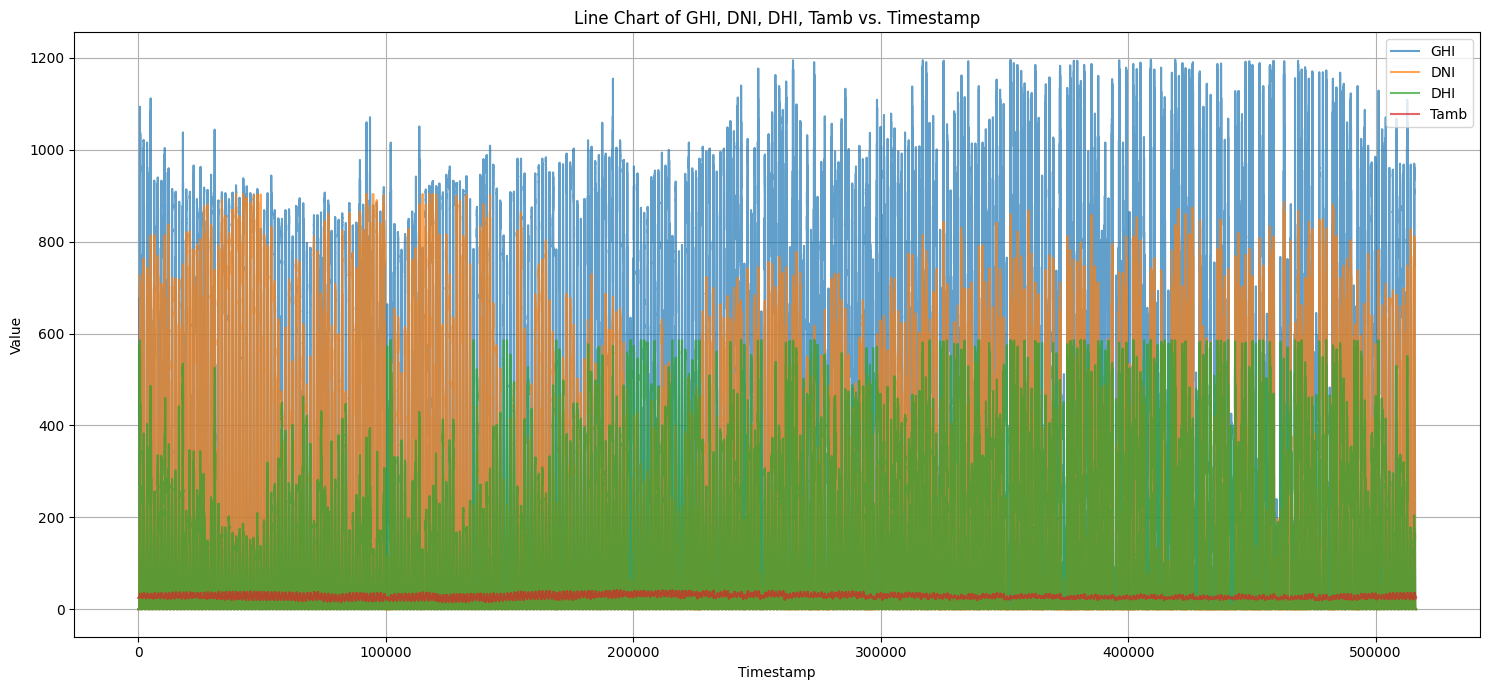

In [28]:
# Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp.
plt.figure(figsize=(15, 7))
plt.plot(togo_cleaned.index, togo_cleaned['GHI'], label='GHI', alpha=0.7)
plt.plot(togo_cleaned.index, togo_cleaned['DNI'], label='DNI', alpha=0.7)
plt.plot(togo_cleaned.index, togo_cleaned['DHI'], label='DHI', alpha=0.7)
plt.plot(togo_cleaned.index, togo_cleaned['Tamb'], label='Tamb', alpha=0.7)
plt.title('Line Chart of GHI, DNI, DHI, Tamb vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\jonep\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


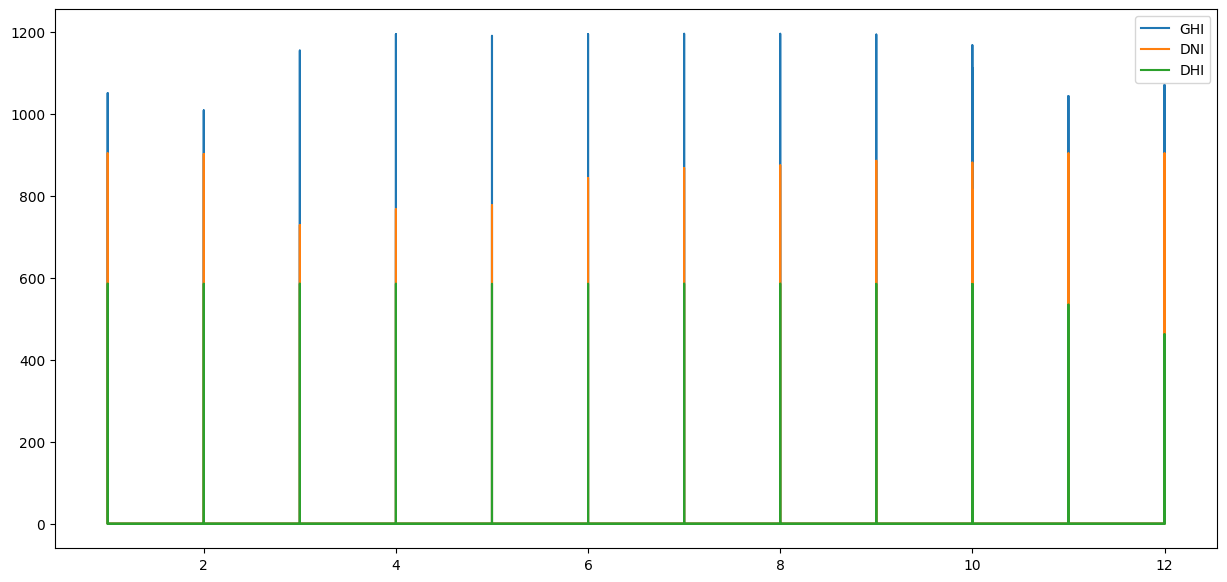

In [29]:
# Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 
plt.figure(figsize=(15, 7))
plt.plot(togo_cleaned['month'], togo_cleaned['GHI'], label='GHI')
plt.plot(togo_cleaned['month'], togo_cleaned['DNI'], label='DNI')
plt.plot(togo_cleaned['month'], togo_cleaned['DHI'], label='DHI')
plt.legend()
plt.show()

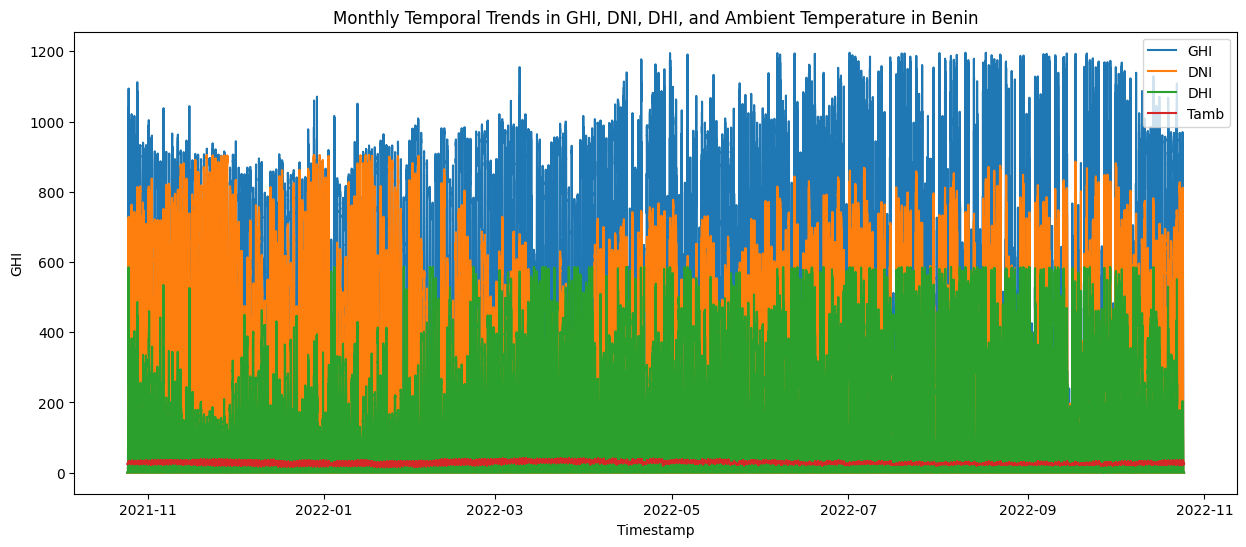

In [30]:
# Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 
plt.figure(figsize=(15,6))
sns.lineplot(data=togo_cleaned, y='GHI', x = 'Timestamp', label = 'GHI')
sns.lineplot(data=togo_cleaned, y='DNI', x = 'Timestamp', label = "DNI")
sns.lineplot(data=togo_cleaned, y='DHI', x = 'Timestamp', label = "DHI")
sns.lineplot(data=togo_cleaned, y='Tamb', x = 'Timestamp', label = "Tamb")

plt.legend(loc = "upper right")
plt.title("Monthly Temporal Trends in GHI, DNI, DHI, and Ambient Temperature in Benin")
plt.show()

Group by Cleaning flag and plot average ModA & ModB pre/post-clean.

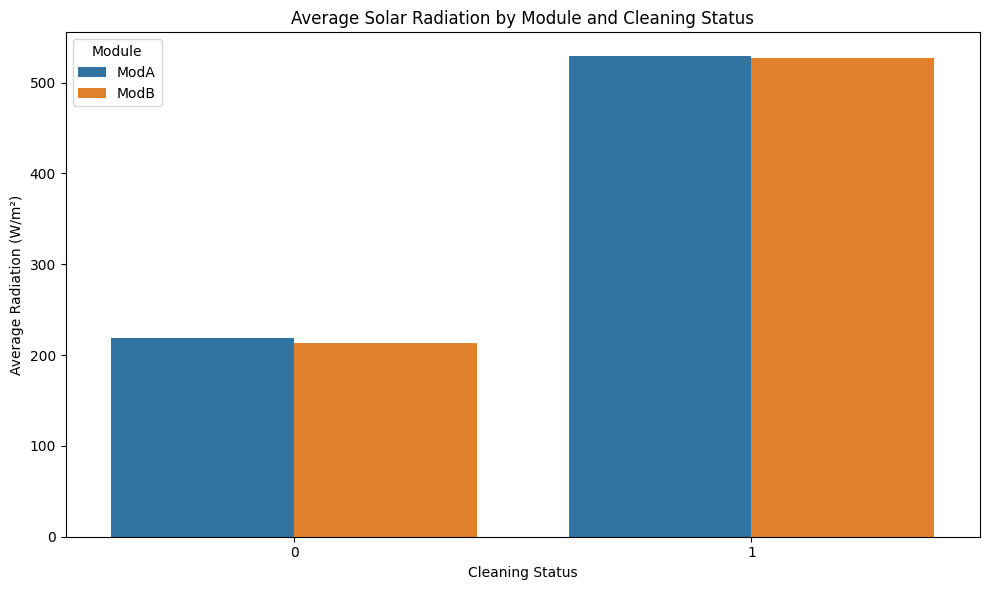

In [31]:
# group 
# Calculate average values by Cleaning Flag
average_values = togo_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Melt the dataframe for easier plotting
avg_values_melted = average_values.melt(id_vars='Cleaning', 
                                   value_vars=['ModA', 'ModB'],
                                   var_name='Module', 
                                   value_name='Average_Radiation')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Cleaning', y='Average_Radiation', hue='Module', data=avg_values_melted)
plt.title('Average Solar Radiation by Module and Cleaning Status')
plt.ylabel('Average Radiation (W/m²)')
plt.xlabel('Cleaning Status')
plt.legend(title='Module')
plt.tight_layout()
plt.show()

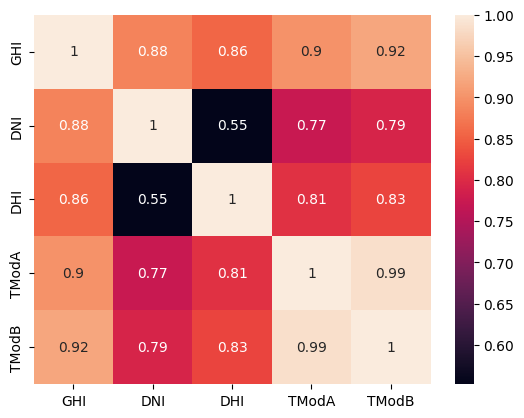

In [32]:
# Correlation & Relationship Analysis
# Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).
corr = togo_cleaned[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr()
sns.heatmap(corr, annot=True)
plt.show()

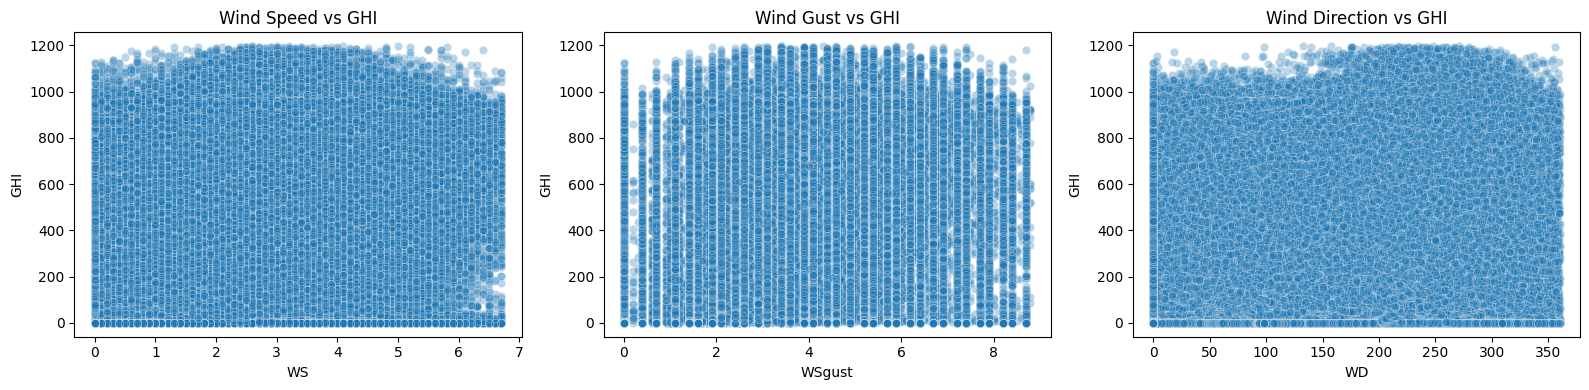

In [33]:
# Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI
plt.figure(figsize=(16, 4))

# WS vs GHI
plt.subplot(1, 3, 1)
sns.scatterplot(data=togo_cleaned, x='WS', y='GHI', alpha=0.3)
plt.title('Wind Speed vs GHI')

# WSgust vs GHI
plt.subplot(1, 3, 2)
sns.scatterplot(data=togo_cleaned, x='WSgust', y='GHI', alpha=0.3)
plt.title('Wind Gust vs GHI')

# WD vs GHI
plt.subplot(1, 3, 3)
sns.scatterplot(data=togo_cleaned, x='WD', y='GHI', alpha=0.3)
plt.title('Wind Direction vs GHI')

plt.tight_layout()
plt.show()

Wind & Distribution Analysis

In [34]:
#Wind rose or radial bar plot of WS/WD.
from windrose import WindroseAxes

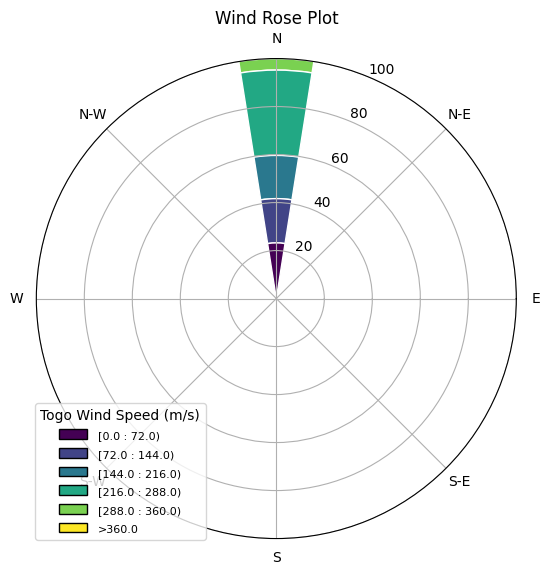

In [35]:
# Create windrose plot
fig = plt.figure(figsize=(8, 6))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(togo_cleaned['WS'], togo_cleaned["WD"], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Togo Wind Speed (m/s)")
plt.title("Wind Rose Plot")
plt.show()

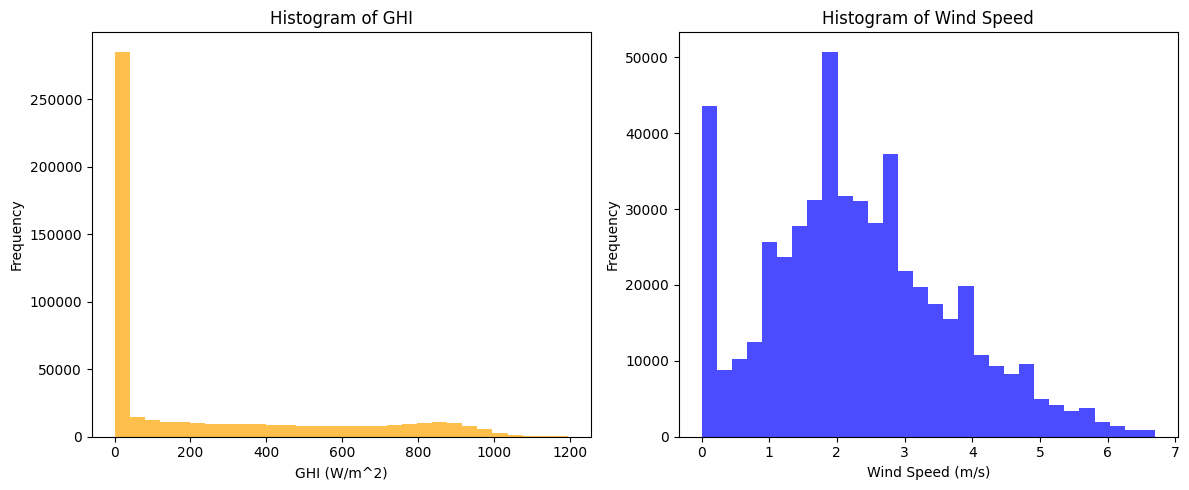

In [36]:
# Histograms for GHI and one other variable (e.g. WS).
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for GHI
axs[0].hist(togo_cleaned['GHI'], bins=30, color='orange', alpha=0.7)
axs[0].set_title('Histogram of GHI')
axs[0].set_xlabel('GHI (W/m^2)')
axs[0].set_ylabel('Frequency')

# Histogram for WS
axs[1].hist(togo_cleaned['WS'], bins=30, color='blue', alpha=0.7)
axs[1].set_title('Histogram of Wind Speed')
axs[1].set_xlabel('Wind Speed (m/s)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Temperature Analysis


In [38]:
# Calculate correlation coefficients
correlation_temp = togo_cleaned['RH'].corr(togo_cleaned['Tamb'])
correlation_solar = togo_cleaned['RH'].corr(togo_cleaned['GHI'])

print(f'Correlation between RH and Temperature: {correlation_temp:.2f}')
print(f'Correlation between RH and Solar Radiation: {correlation_solar:.2f}')

Correlation between RH and Temperature: -0.40
Correlation between RH and Solar Radiation: -0.25


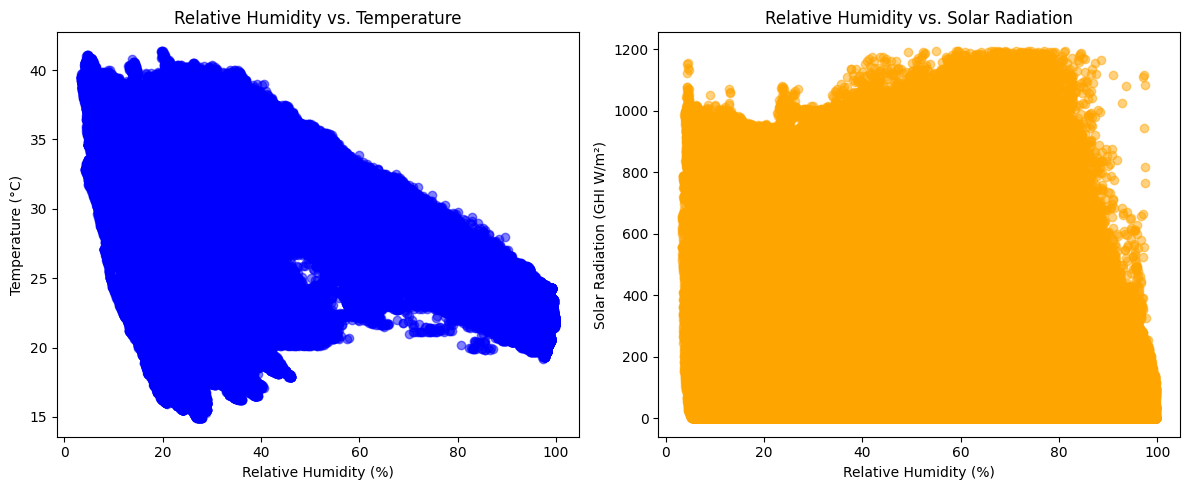

In [39]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Scatter plot for RH vs. Temperature
plt.subplot(1, 2, 1)
plt.scatter(togo_cleaned['RH'], togo_cleaned['Tamb'], alpha=0.5, color='blue')
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
# Scatter plot for RH vs. GHI
plt.subplot(1, 2, 2)
plt.scatter(togo_cleaned['RH'], togo_cleaned['GHI'], alpha=0.5, color='orange')
plt.title('Relative Humidity vs. Solar Radiation')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Solar Radiation (GHI W/m²)')

plt.tight_layout()
plt.show()

Bubble Chart
- GHI vs. Tamb with bubble size = RH or BP.

C:\Users\jonep\AppData\Local\Temp\ipykernel_10836\817186438.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(togo_cleaned['GHI'], togo_cleaned['Tamb'], s=bubble_sizes,


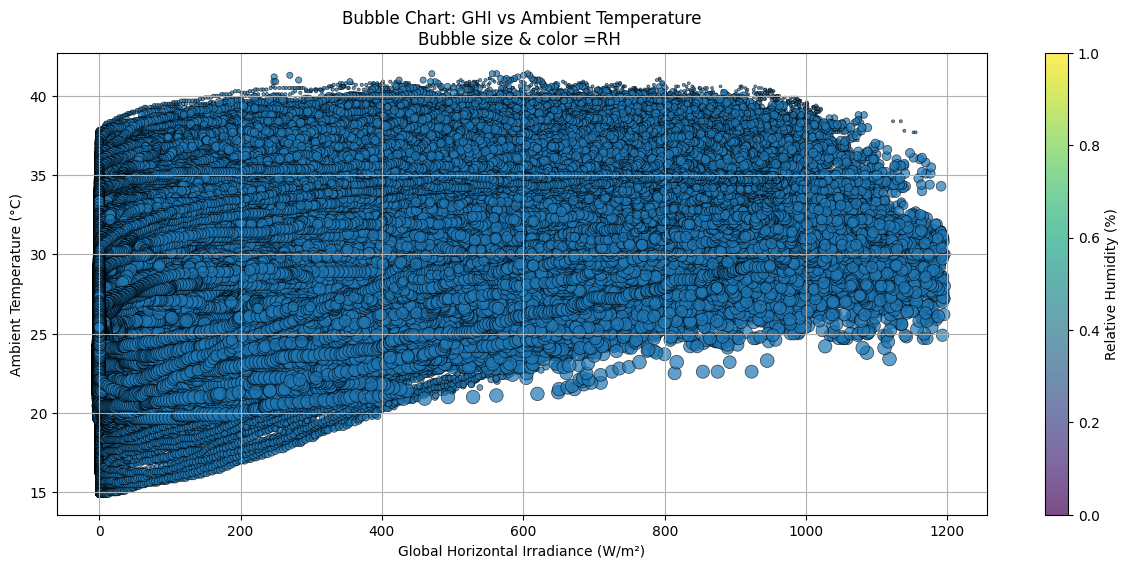

In [40]:
# Scale bubble sizes (adjust the multiplier for better visualization)
bubble_sizes = togo_cleaned['RH']

plt.figure(figsize=(15, 6))
scatter = plt.scatter(togo_cleaned['GHI'], togo_cleaned['Tamb'], s=bubble_sizes, 
                      cmap='coolwarm', alpha=0.7, edgecolors='k', linewidth=0.5)

plt.colorbar(scatter, label='Relative Humidity (%)')
plt.xlabel('Global Horizontal Irradiance (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Bubble Chart: GHI vs Ambient Temperature\nBubble size & color =RH ')
plt.grid(True)
plt.show()